# Probability
### `! git clone https://www.github.com/ds4e/probability`

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Probability
- So we have some skills to get data and put into a workable form (data wrangling, EDA, visualization)
- We have some basic but powerful tools to analyze data and create predictive models ($k$-NN, $k$-MC, linear models, decision trees)
- We want to ask questions like, How much uncertainty does there appear to be in our predictions? How well is this model likely to perform on new data? Does this model work well in any absolute sense?
- To proceed, we need to add some more ideas about probability and randomness, in order to communicate with each other and understand tools
- These two lectures (probability and bootstrapping) are probably the most difficult in the class, but the payoff is absolutely worth it

## A Fair Die
- Let's consider something very simple: Rolling a "fair" 6-sided die where each side is equally likely.
- There are six sides with pips $\cdot$, $2\cdot$, $3\cdot$, $4\cdot$, $5\cdot$, and $6 \cdot$
- Besides the sides themselves, we can define outcomes like *odd*, $\left\lbrace 1\cdot, 3\cdot, 5\cdot \right\rbrace$, and *even*, $\left\lbrace 2\cdot, 4\cdot, 6\cdot \right\rbrace$.
- If each side is equally likely, the probability we observe any given side should be 1/6; this allows us to work out the likelihood of observing any particular collection of sides, like even or odd.
- What are all these ideas, in an abstract sense?

## A Fair Die
- There are six sides with pips $\cdot$, $2\cdot$, $3\cdot$, $4\cdot$, $5\cdot$, and $6\cdot$. **This is called the *sample space* and each possibility in it is called an outcome**.
- Besides the sides themselves, we can define outcomes like *odd*, $\left\lbrace 1\cdot, 3\cdot, 5\cdot \right\rbrace$, and *even*, $\left\lbrace 2\cdot, 4\cdot, 6\cdot \right\rbrace$. **This is called the set of *events*: all of the "relevant" sets of outcomes that might occur.**
- If each side is equally likely, the probability we observe any given side should be 1/6; this allows us to work out the likelihood of observing any particular collection of sides, like even or odd. **This is called a *probability mass function*, associating every set of events with a number between 0 and 1.**

## Probabilities
- There are many nuances about what rules a "probability function" must satisfy that we are going to gloss over
- The key rules are these:
  - The probability of nothing happening is zero, the probability of something happening is 1
  - The probability of every event is between zero and 1
  - If you have a set of events $e_1, e_2, ..., e_N$ where no outcome occurs in more than one event (e.g. even and odd), then
  $$
  p(e_1 \text{ and } e_2 \text{ and } ... \text{ and } e_n) = p(e_1) + p(e_2) + ... + p(e_N)
  $$
- Everything we talk about today holds for situations where there are a finite or infinite number of outcomes, as long as you set things up "correctly"

## Notation
- Let's call the sample space $S$ and individual outcomes $x$
- Let's call the set of all events $E$ and an individual event $e$
- Let's call the probability function $p(e)$
- We can write that 
    1. $p(S)=1$
    2. $0 \le p(e) $ for all events $e$ in $E$
    3. If every outcome appears at most once in a set of events $e_1, ..., e_n$, $p(e_1 \text{ and } e_2 \text{ and } ... \text{ and }e_n) = \sum_{i=1}^n p(e_i)$

## Betting on Dice
- For example, let's bet on the roll of two six-sided die
- An outcome is a pair of die faces, like $(3\cdot,6\cdot)$. The sample space is:
$$
\left[ \begin{array}{cccccc}
(1\cdot,1\cdot) & (1\cdot,2\cdot) & (1\cdot,3\cdot) & (1\cdot,4\cdot) & (1\cdot,5\cdot) & (1\cdot,6\cdot) \\
(2\cdot,1\cdot) & (2\cdot,2\cdot) & (2\cdot,3\cdot) & (2\cdot,4\cdot) & (2\cdot,5\cdot) & (2\cdot,6\cdot) \\
(3\cdot,1\cdot) & (3\cdot,2\cdot) & (3\cdot,3\cdot) & (3\cdot,4\cdot) & (3\cdot,5\cdot) & (3\cdot,6\cdot) \\
(4\cdot,1\cdot) & (4\cdot,2\cdot) & (4\cdot,3\cdot) & (4\cdot,4\cdot) & (4\cdot,5\cdot) & (4\cdot,6\cdot) \\
(5\cdot,1\cdot) & (5\cdot,2\cdot) & (5\cdot,3\cdot) & (5\cdot,4\cdot) & (5\cdot,5\cdot) & (5\cdot,6\cdot) \\
(6\cdot,1\cdot) & (6\cdot,2\cdot) & (6\cdot,3\cdot) & (6\cdot,4\cdot) & (6\cdot,5\cdot) & (6\cdot,6\cdot) 
\end{array} \right]
$$
- The events $E$ are all of the subsets of the above matrix (e.g. "All rolls where both results are even", "all rolls that sum to 7", "All rolls where both the dice show the same outcome")
- For fair dice, each pair above is equally likely with probabilty $1/36$
- Notice, the outcomes here aren't strictly numeric: They could be colors, animals, job titles, car models, anything. Outcomes aren't fundamentally numeric.

# Random Variables, Expectation, Variance

## Random Variables
- A **random variable** is a rule that assigns numbers to outcomes
- A random variable is a function $R$ that assigns a number $R(x)$ to each outcome $x$ in $S$
- A random variable is how we quantify the consequences of an uncertain phenomenon
- A random variable is not its probability function (e.g "normal random variable" is not really correct -- the random variable is normally distributed )

## The Expectation
- What value is a random variable going to take?
- Since a random variable is a rule that assigns a numeric value to every outcome, we can weight those values by the probabilities they occur, and sum:
$$
\mathbb{E}[R] = p(x_1) R(x_1) + p(x_2)R(x_2) + ... + p(x_N)R(x_N) = \sum_{i =1}^N p(x_i)R(x_i)
$$
- If the outcomes are numbers and all equally likely, we can set $R(x_i) = x_i$ and $p(x_i) = 1/N$, which gives
$$
\mathbb{E}[R] = \dfrac{1}{N} x_1 + \dfrac{1}{N} x_2 + ... + \dfrac{1}{N} x_N = \dfrac{1}{N} \sum_{i =1}^N x_i
$$
- This is called the **expectation of $R$** or the **expected value of $R$**. It is often denoted by $\mu$ or $\mu_R$, to emphasize it's a theoretical/population value. 

## Gambling
- What's the expected value of rolling two dice, if you get the sum of the faces in money?
- What's the expected value of a gamble where you get 10 if the sum is strictly greater than 7, but -5 if the sum is weakly less than 7?
- What's the expected value of a gamble where you get 100 if the sum is odd and -50 if the sum is even?
- What would you will be willing to pay for the above gambles?

## The Variance
- The variance of a random variable is an abstraction of sample variance: There is no sample with $1/N$ weighting, and we compute weights against the probability function instead
- The **variance of $R$** is
$$\mathbb{V}[R] = p(x_1)(R(x_1)-\mathbb{E}[R])^2 + p(x_2)(R(x_2)-\mathbb{E}[V])^2 + 
... + p(x_N)(R(x_N)-\mathbb{E}[R])^2 = \sum_{i=1}^N p(x_i)(R(x_i)-\mathbb{E}[R])^2
$$
- You can also write this as
$$
\mathbb{V}[R] = \mathbb{E}\left[ (R-\mathbb{E}[R])^2\right]= \mathbb{E}\left[ (R-\mu_R)^2\right]
$$
- The variance is often denoted $\sigma^2$ or $\sigma_R^2$, to emphasize it's a theoretical/population value. 

# Random Number Generation in Python

- Suppose you have a set $S$, like $S = \{1,2,3,4,5,6\}$, or `S = np.arange(6)+1`. For example, suppose you want to sample observations from your data frame: that corresponds to `np.arange( df.shape[0])`.
    - To **sample with replacement**, you can use Numpy's `random.choice(S,size=n)` function to take $n$ draws from $S$, with the potential for repetition
    - To **sample without replacement**, you can use Numpy's `np.random.shuffle(S)` function to randomize the order of the elements in $S$, and then $S[:N]$ to slice the first $N$ elements from the shuffled $S$
- To draw `N` numbers from between 0 and 1 with uniform probability, you can use `np.random.uniform(size=N)`
- To draw `N` numbers from a normal distribution with mean $m$ and standard deviation $s$, you can use `np.random.normal(m,s,size=N)`

In [ ]:
S = np.array([1,2,3,4,5,6]) # Object to sample
x = np.random.choice(S, size=3)
print(x)
x = np.random.choice(S, size=10)
print(x)

[4 3 6]
[5 3 3 1 5 2 5 4 5 6]


In [3]:
S = np.array([1,2,3,4,5,6]) # Object to sample
N = 3 # Elements to take

np.random.shuffle(S) # 1. Shuffle x
print(S) 
y = S[:N] # 2. Take the first N elements
print(y)

[2 6 3 1 4 5]
[2 6 3]


[2.93985783e-01 9.60477726e-01 5.97460677e-01 3.56094592e-01
 1.61017731e-01 4.64420094e-01 8.21111521e-01 3.15617035e-01
 1.39984978e-01 9.40703972e-01 2.69172091e-01 9.60233535e-01
 7.11577297e-02 9.63150015e-01 2.06496345e-02 6.76100160e-01
 5.77067305e-01 3.92784558e-01 3.84201454e-01 9.03116168e-01
 8.64151683e-01 5.70733118e-01 5.11710234e-01 4.83404028e-02
 7.21242549e-01 8.56276276e-02 6.28028939e-02 3.90997417e-01
 9.55117772e-01 5.21077990e-01 7.94217672e-01 6.11888078e-01
 1.52099516e-01 8.94702377e-01 8.83891767e-01 8.10963296e-01
 1.26716326e-02 9.33637456e-01 4.27036245e-01 5.25141232e-01
 4.13201341e-01 1.75872934e-01 7.05383704e-01 6.91154850e-01
 2.58101394e-02 6.79978488e-01 8.25629219e-01 6.42766555e-01
 4.15666467e-01 6.69826519e-01 9.14548202e-01 5.01320915e-01
 2.36714430e-02 2.23740814e-01 5.38185662e-03 5.84722291e-01
 2.85395158e-01 9.73197453e-01 5.02721547e-01 2.47341450e-01
 5.55495134e-01 1.39477714e-01 7.78991634e-03 8.61416569e-01
 7.33589944e-01 4.318348

<Axes: ylabel='Count'>

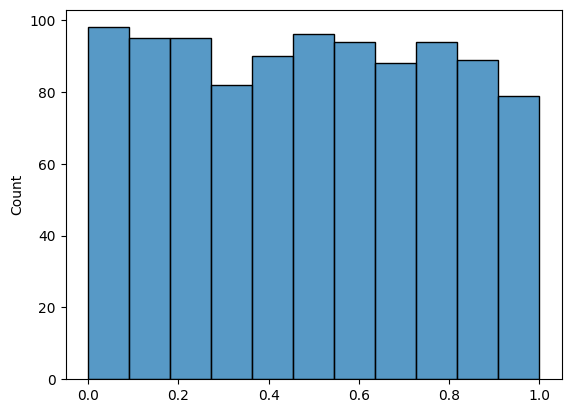

In [7]:
X = np.random.uniform(size=1000) # A random sample of uniformly distributed numbers
print(X)
sns.histplot(X)

[ 7.20998460e+00  1.20447556e+01  2.37173393e+01  1.87812825e+01
  7.27978834e+00  1.48844196e+01  9.27366409e+00  1.09799193e+01
  2.99645878e+00  1.09347892e+01  3.43162490e+00  6.98488769e+00
  1.17141308e+01  7.23053420e+00  6.27599830e+00  9.79715744e+00
  9.46161420e+00  4.19906473e+00  1.68149533e+01  5.26316439e+00
  1.42997207e+01  6.43813186e+00  8.20729247e+00  1.20454100e+01
  1.33448315e+01  1.04588446e+01  1.45454433e+01  1.02713423e+01
  8.91094029e+00  1.44855962e+01 -2.89904918e+00  1.24374105e+01
  3.75026856e+00  7.35460896e+00  1.14363502e+01  1.13967418e+01
  1.13004789e+01  8.54954746e-01  1.50912126e+01  1.43302901e+01
  9.37978334e+00  8.25767629e+00  1.29433580e+01  1.79190478e+01
  8.86699669e+00  1.50616812e+01  1.24387355e+01  1.08571062e+01
  5.28308469e+00  4.40875207e+00 -6.15991554e-01  9.92326166e+00
  1.19553329e+01  1.24788544e+01  1.37678577e+01  1.05390708e+01
  1.46991522e+01  1.46069511e+01  9.29007300e+00  1.85341388e+01
  9.62040195e+00  6.72390

<Axes: ylabel='Density'>

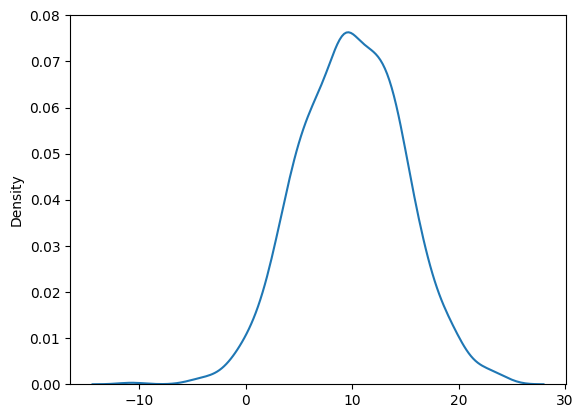

In [8]:
X = np.random.normal(10,5,size=1000) # A random sample of normally distributed numbers
print(X)
sns.kdeplot(X)

# Asymptotic Theory

## The Law of Large Numbers
- The next five slides are about expanding your understanding of the fundamental nature of reality
- If you are the kind of person who says they "do not like math" or "are not good at math", that's OK, this isn't on a test
- This is what real, useful mathematics looks like: A sequence of logical inferences which come together in a powerful insight about quantitative reality
- Even if you don't understand every line and manipulation, knowing roughly how humans create quantitative ideas and statistical evidence means your understanding of what is possible expands, and that is valuable on its own

## Markov's Inequality
- Suppose that $R(x_i) \ge 0$, so all the random variable only takes non-negative values
- Pick a value $a$ that is between $x_1$ and $x_N$. What can we say about the relationship between $p$, $\mathbb{E}[R]$, and $a$?
\begin{alignat*}{2}
\mathbb{E}[R] &=& \sum_{R(x_i) < a} p(x_i) R(x_i) + \sum_{R(x_i) \ge a} p(x_i) R(x_i) \\
& \ge & \sum_{R(x_i) < a} p(x_i) 0 + \sum_{R(x_i) \ge a} p(x_i) R(x_i) \\
& \ge & \sum_{R(x_i) \ge a} p(x_i) a \\
& =& p[R \ge a] a
\end{alignat*}
- This implies that if $R(x) \ge 0$ for all $x$ in $S$, then for any $a$, 
$$
p[R \ge a] \le \dfrac{\mathbb{E}[R]}{a}
$$
- This is called **Markov's Inequality**: The probability that a non-negative random variable exceeds a threshold is bounded by its expectation divided by the threshold

## Chebyshev's Inequality
- OK, can we relate $\mathbb{E}[R]$, $p$, and $\sigma$ in a useful way?
- If we use Markov's inequality with $R(x) = (x-\mu)^2$, we get another useful inequality:
\begin{alignat*}{2}
p[ |x-\mu| \ge d ] &=& p[ \sqrt{(x-\mu)^2} \ge d ] \\
&=& p[ (x-\mu)^2 \ge d^2 ] \\
&\le& \dfrac{\mathbb{E}[ (X-\mu)^2 ]}{d^2 }\\
p[ |x-\mu| \ge d  ] &\le & \dfrac{\sigma^2}{d^2 }\\
\end{alignat*}
- This provides a bound on how far a random variable $R(x)=x$ can be from its average, based on the variance $\sigma^2$ and a distance $d$:
$$
p\left[ |x-\mu| \ge d \right] \le \dfrac{\sigma^2}{d^2}
$$
- This is called **Chebyshev's Inequality**: The distance $d$ a random variable $X$ is from its mean $\mu$ is bounded by its variance $\sigma^2$ divided by the distance squared $d^2$.

## Example: Normal
- These inequalities are used for theory, not for computations: We have computers for that in 2025
- But we can work out a specific example. Let's suppose $X$ is normally distributed, with mean $\mu$ and standard deviation $\sigma$
- The event $|x-\mu| \ge d$ is equivalent to two events: $ x - \mu \ge d$ and $ x - \mu \le -d $
- So we're looking for the probability that $x \ge \mu + d$ or $x \le \mu - d$
- We can use the `scipy.stats.norm` class to do this 

In [11]:
from scipy.stats import norm

mu = 100
sigma = 1
d = 1

print('sigma^2/d :', sigma**2/d)

# So we need two probabilities:

P1 = norm.cdf(mu - d, mu, sigma) # x < mu - d
P2 = 1 - norm.cdf(mu + d, mu, sigma) # x > mu + d

print(P1 + P2)

sigma^2/d : 1.0
0.31731050786291415


- No matter what values you put in, the first line will always be bigger than the second

<Axes: >

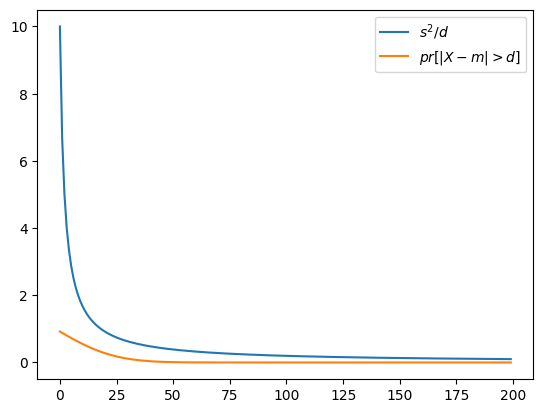

In [ ]:
mu = 100
sigma = .5

d_grid = np.linspace(.1,10,200)
curve_1 = []
curve_2 = []
for k in range(len(d_grid)):
    d = d_grid[k]
    P1 = norm.cdf(mu - d, mu, sigma) # x < mu - d
    P2 = 1 - norm.cdf(mu + d, mu, sigma) # x > mu + d   
    curve_1.append(sigma**2/d)
    curve_2.append(P1+P2)

sns.lineplot(y=curve_1,x=d_grid,label='$s^2/d$')
sns.lineplot(y=curve_2,x=d_grid,label='$pr[|X-m| > d]$')

## Independent and Identically Distributed Sequences (iid)
- A fundamental concept in probability and statistics is the abstract idea of running an "experiment" over and over, and computing statistics for the results
- Let $x_1$ be the result of the first experiment, $x_2$ the result of the second, and so on
- Assume that the draws $x_1, x_2, ...$ 
  - are **identically distributed**: They are all drawn from the same distribution function and all have the same mean $\mu$ and variance $\sigma^2$
  - are **independent**: The outcome of draw $x_n$ doesn't affect the outcome of any draw $x_m$, $m \neq n$
- The **sample average** of our experimental sequence is
$$
\bar{X}_n = \dfrac{1}{n} \sum_{i=1}^n x_i
$$
and the **sample variance** of our experimental sequence is
$$
\bar{s}_n^2 = \dfrac{1}{n} \sum_{i=1}^n (x_i - \bar{X}_n)^2
$$

## Independent and Identically Distributed Sequences (iid)
- The sample average and sample variance are now, themselves, random variables, with their own outcomes, events, probabilities, and so on
- What is the expected value of $\bar{X}_n$?
$$
\mathbb{E}[\bar{X}_n] = \mathbb{E}\left[ \dfrac{1}{n} X_1 + X_2 + ... + X_n \right] = \dfrac{\mathbb{E}[X_1] + ... + \mathbb{E}[X_n]}{n} = 
\dfrac{\mu + ... + \mu}{n} = \dfrac{n\mu}{n} = \mu
$$
- Likewise (but slightly different steps)
$$
\mathbb{V}[\bar{X}_n] = \mathbb{V}\left[\frac{1}{n}(X_1 + X_2 + ... + X_n)\right] = \frac{1}{n^2} \mathbb{V}[X_1 + X_2 + ... + X_n] =\frac{1}{n^2} \left( \mathbb{V}[X_1] + \mathbb{V}[X_2] + ... + \mathbb{V}[X_n] \right) = \frac{n}{n^2} \sigma^2 = \frac{\sigma^2}{n}
$$
- To emphasize that the sample space of $S_n$ depends on the sequence $n$, we'll write the probability function as $p_n$

## Law of Large Numbers
- Take the random variable as the sample mean $X_n$ of a sequence of iid random variables, with mean $\bar{X}_n = \dfrac{1}{n} \sum_{t=1}^n x_i$ and variance $\mathbb{V}[\bar{X}_n] = \sigma^2/n$
- By Chebyshev's inequality,
$$
p_n\left[ |\bar{X}_n - \mu|  \ge d \right] \le \dfrac{\mathbb{V}[\bar{X}_n]}{d^2} = \dfrac{\sigma^2}{n d^2}.
$$
- **As $n$ gets large on the far right, $\frac{\sigma^2}{nd^2}$ goes to zero, for any $d$.**
- This is called the **Weak Law of Large Numbers**: Sample averages *converge in probability* to the true average $\mu$ as long as the variance $\sigma^2$ is finite.
- The importance of this idea cannot be understated: This is one of the most important ideas that humanity has discovered

# Examples

## Example: Estimating Probabilities
- R is going to draw a number $h$ between 0 and 1, but it isn't going to tell us what it is. R will, however, flip a coin that comes up heads[1] with probability $h$ or tails[0] with probability $1-h$
- Each flip $x_i$ is either equal to 0 for tails or 1 for heads, so the average of the flips is
$$
\bar{X}_n = \dfrac{x_1+x_2 + ... + x_n}{n} = \{\text{The sample proportion of heads}\} = h_n
$$
- As the number of flips gets large, by the LLN, the sample average $h_n$ will converge in probability to the true value $h$
- As a consequence of the LLN, *sample proportions converge to population probabilities as the sample gets large*

In [ ]:
# Data generation:
h = np.random.uniform() # Unfair coin we don't observe
n = 100 # Sample Size
flips =  np.random.uniform(size=n) < h  # Flips we observe

# Our analysis of the data, 'flips':
h_n = flips.mean() # Our estimate of h
print(h_n)

# What's the true value?
print(h) # True value


0.3
0.36252279833801393


## Example: Estimating Averages
- Any given outcome of a gamble is not informative of the value of the gamble in expectation
- But if we average many iid plays of the gamble and average the payoffs, the LLN tells us that the sample average will converge to the true value of the gamble
- The expected value calculations we were doing earlier by hand can be done by simulation on a computer
- This is all mathematical finance/engineering is: More complex versions of this kind of calculation

In [ ]:
# Set up the gamble:
winning_values = np.array([7,11]) # Which values between 2 and 12 count as a 'win'?
winning_amount = 1 # Amount received if you win
losing_amount = 0 # Amount paid if you lose
die = np.arange(6)+1
n = 1000 # Number of simulations of the gamble

# Simulate the gamble:
rolls = np.random.choice(die, size=[n,2])  # Roll 2 dice n times
sums = rolls.sum(axis=1)

# Determine winning and losing rolls:
winning_rolls = np.in1d(sums,winning_values)
losing_rolls = 1-winning_rolls

# Compute payoffs:
payoff = winning_rolls*winning_amount + losing_rolls*losing_amount

# Compute expected payoff:
payoff.mean()

0.23

## Example: Regression
- How do we know regression means anything?
- The optimal coefficients in a simple linear regression $\hat{y}_i = a + b x_i$ can be written
\begin{alignat*}{2}
a^*_N &=& \dfrac{1}{N} \sum_{i=1}^N y_i - \dfrac{ \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y}_n)(x_i-\bar{x}_n)}{\frac{1}{N} \sum_{i=1}^N (x_i- \bar{x}_n)^2}\dfrac{1}{N} \sum_{i=1}^N x_i\\
b^*_N &=& \dfrac{ \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y}_n)(x_i-\bar{x}_n)}{\frac{1}{N} \sum_{i=1}^N (x_i- \bar{x}_n)^2}
\end{alignat*}
- These are all just sample averages of various kinds. There are rules about how the LLN can be combined with these kinds of functions to know that $a^*_N$ and $b^*_N$ converge since $\bar{y}_N$ and $\bar{x}_N$ converge (Slutsky's Theorem, Portmanteau Theorem, Continuous Mapping Theorem).
- As the sample size gets large, there are theoretical limit values they converge to: We should expect order to arise out of the randomness, even if we have no idea what they are.

In [ ]:
import pandas as pd

n = 250 # Number of observations

## Data creation:
b0 = 1 # True intercept coefficient
b1 = 3 # True slope coefficient
b2 = 5 # True slope coefficient
x1 = np.random.normal(5,2,n) # Covariate 1
x2 = np.random.normal(-3,1,n) # Covariate 2
noise = np.random.normal(0,1,n) # Error term
y = b0 + b1*x1 + b2*x2 + noise # Compute Outcome/Target Variable
df = pd.DataFrame({'y':y,'x1':x1,'x2':x2}) # Create data frame

## Data analysis:
from sklearn.linear_model import LinearRegression # Import linear regression model
X = df.loc[:,['x1','x2']] # Construct data matrix
y = df['y'] # Response variable
reg = LinearRegression().fit(X, y) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients


1.3389562512450843
[2.99058257 5.0926713 ]


## Example: European Call Option
- A **derivative** is a financial contract that is bought and sold, specifying the right to buy an asset at a fixed price on a specified future date
- The stock price evolves as $p_{t+1} = p_t + \sigma \varepsilon_t$, where the shocks $\varepsilon_t$ are normally distributed with mean $\mathbb{E}[\varepsilon_t] =0$ and standard deviation $\sigma = 5$
- Suppose the stock price is currently valued at $p_0 = 100$. At the **expiration date** in one month, you can buy the stock at the **strike price** of $K$. This is called a **European Call Option**.
- Notice you will only purchase the asset in a month if the the price in a month exceeds the strike price.
- **What is the probability the time-$t$ price exceeds the strike price $K=95$?** 
- **What is the fair price of the European Call Option today?**
- This is a problem in quantitative finance.

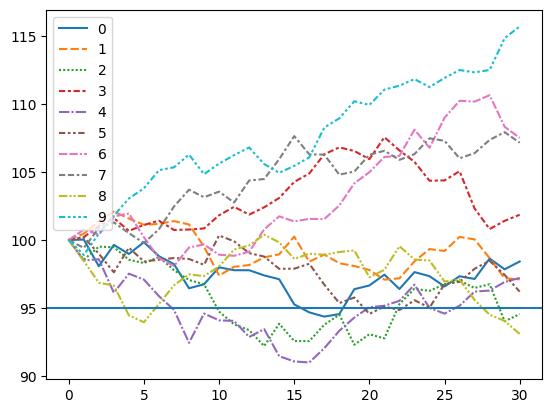

In [18]:
import numpy as np
import seaborn as sns

R = 10
sigma = 1
p_old = 100
T = 30

data = []
for r in range(R):
    shocks = np.random.normal(loc=0,scale=sigma,size=T)
    p_old = 100
    price_seq = [p_old]
    for t in range(T):
        p_new = p_old +  shocks[t]
        price_seq.append(p_new)
        p_old = p_new
    data.append(price_seq)

sns.lineplot(data)
plt.axhline(y=95) 

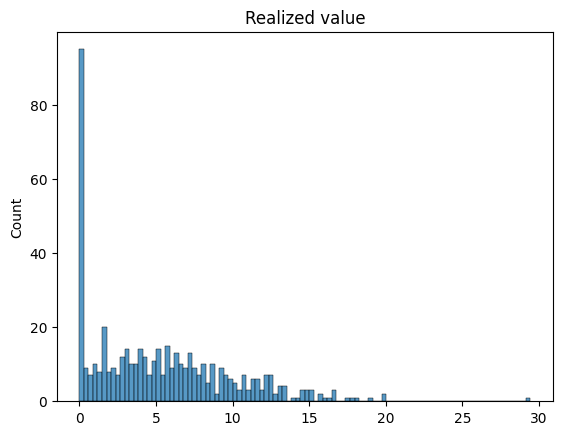

Average payout of the asset:  5.312345577383096


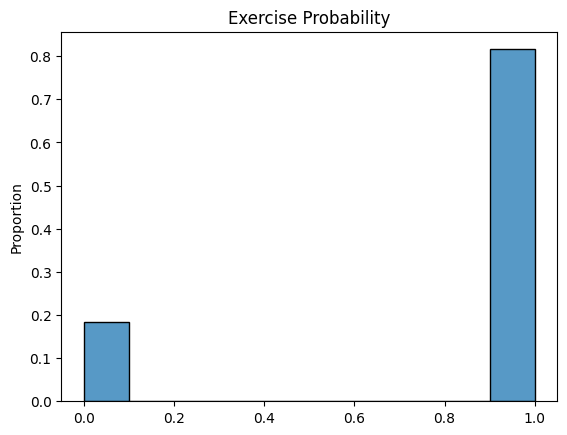

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

R = 500
sigma = 1
p_old = 100
T = 30

value = []
exercise = []
for r in range(R):
    shocks = np.random.normal(loc=0,scale=sigma,size=T)
    p_old = 100
    price_seq = [p_old]
    for t in range(T):
        p_new = p_old +  shocks[t]
        price_seq.append(p_new)
        p_old = p_new
    if p_old > 95 : # Buy option
        gain = p_old - 95
        exr = 1
    else:
        gain = 0
        exr = 0
    value.append(gain)
    exercise.append(exr)

In [ ]:
sns.histplot(value,bins=100).set(title='Realized value')
plt.show()
sns.histplot(exercise,stat='proportion').set(title='Exercise Probability')
print( 'Average payout of the asset: ', np.mean(value) )


# Conclusion

## WLLN versus CLT [Stats]
- The WLLN says that sample means converges in probability to the true mean for iid sequences, if the variance is finite
- The Central Limit Theorem says something else: That the distribution function of $\sqrt{n}( \bar{X}_n - \mu)$ converges to a normal with mean 0 and variance $\sigma^2$ as the sample size gets large.
- These aren't the same: The WLLN says that sample means converge to the truth, while the CLT says the distribution of $(\bar{X}_n-\mu)/\sigma$ converges to a standard normal distribution as the sample size gets large.

## Next Class
- We have just admitted that our estimates (the $h_n$, the regression coefficients, etc.) are noisy: They'll be close to the truth if $N$ is large, by the Law of Large Numbers... but we know they're still not *exactly* correct
- Can we quantify this uncertainty about our estimates? How?
- This is going to motivate a framework called *bootstrapping*